In [9]:
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, concatenate
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 5565, 1)]    0           []                               
                                                                                                  
 conv1d_3 (Conv1D)              (None, 5563, 32)     128         ['input_3[0][0]']                
                                                                                                  
 max_pooling1d_3 (MaxPooling1D)  (None, 2781, 32)    0           ['conv1d_3[0][0]']               
                                                                                                  
 dropout_5 (Dropout)            (None, 2781, 32)     0           ['max_pooling1d_3[0][0]']        
                                                                                            

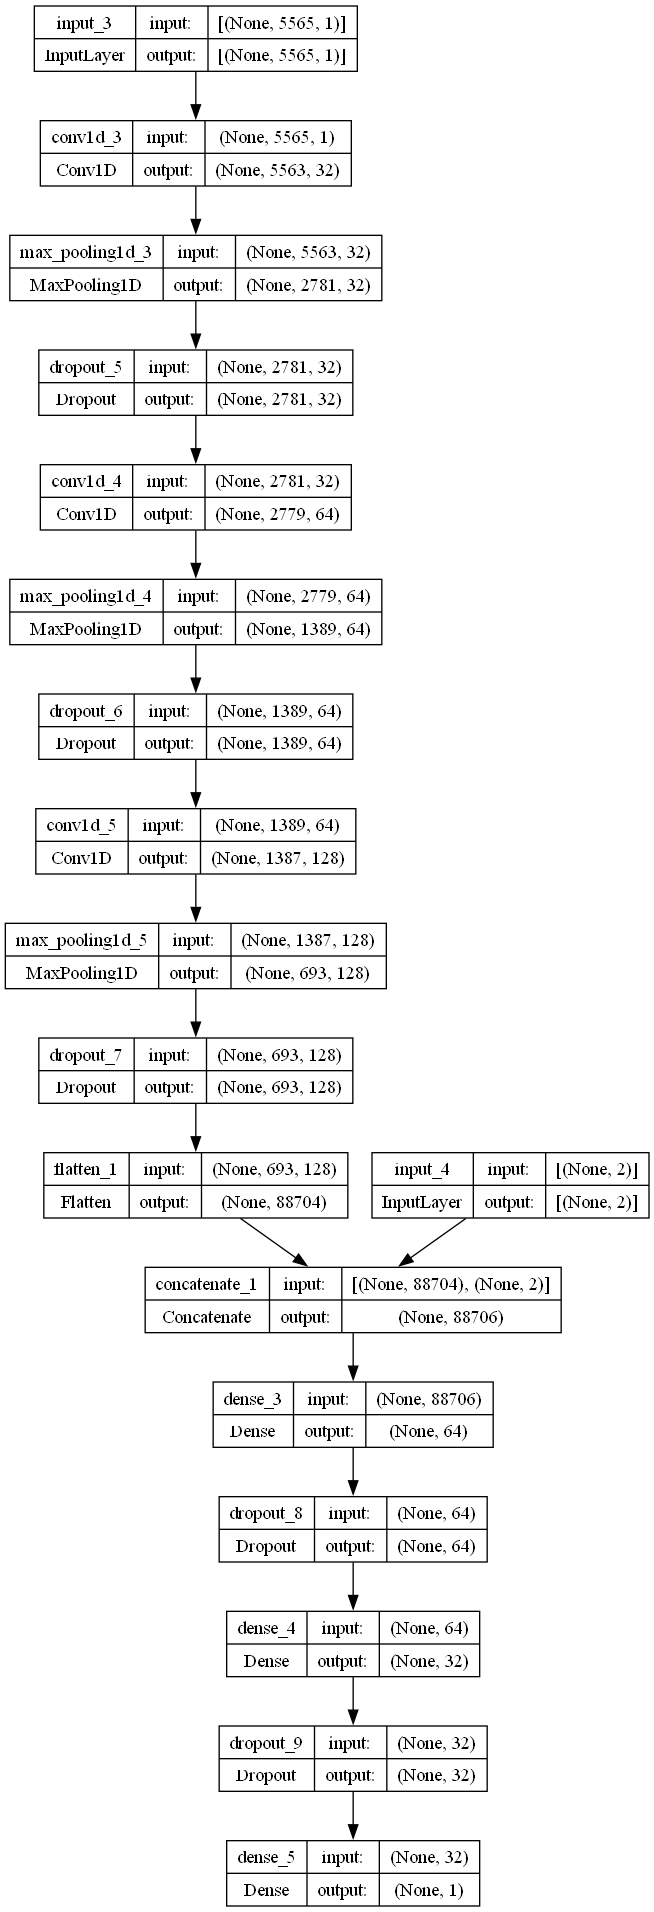

In [10]:

# Define CNN for seismogram input
def create_seismogram_model():
    # Seismogram input
    seismogram_input = Input(shape=(5565, 1))
    
    # Convolutional layers for seismogram data
    x = Conv1D(filters=32, kernel_size=3, activation='relu')(seismogram_input)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.3)(x)
    
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.3)(x)
    
    x = Conv1D(filters=128, kernel_size=3, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.3)(x)
    
    # Flatten the convolutional layer output
    seismogram_output = Flatten()(x)
    
    return seismogram_input, seismogram_output

# Define auxiliary inputs for standard deviation and other values
def create_aux_input():
    # Auxiliary input (standard deviation, other values)
    aux_input = Input(shape=(2,))
    return aux_input

# Combine seismogram and auxiliary inputs
def create_combined_model():
    # Get seismogram and auxiliary models
    seismogram_input, seismogram_output = create_seismogram_model()
    aux_input = create_aux_input()
    
    # Concatenate seismogram and auxiliary inputs
    combined = concatenate([seismogram_output, aux_input])
    
    # Fully connected layers
    x = Dense(64, activation='relu')(combined)
    x = Dropout(0.4)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.4)(x)
    
    # Output layer (binary classification)
    output = Dense(1, activation='sigmoid')(x)
    
    # Define the complete model
    model = Model(inputs=[seismogram_input, aux_input], outputs=output)
    
    # Compile the model
    opt = Adam(learning_rate=0.0002)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Create the model
model = create_combined_model()

# Summary of the model
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)


In [11]:
import numpy as np
# Load the data back into your new environment
X_data = np.load('./data/lunar/training/catalogs/X_data.npy')
y_labels = np.load('./data/lunar/training/catalogs/y_labels.npy')
aux_data = np.load('./data/lunar/training/catalogs/aux_data.npy')
X_data1 = np.load('./data/lunar/training/catalogs/X_data1.npy')
y_labels1 = np.load('./data/lunar/training/catalogs/y_labels1.npy')
aux_data1 = np.load('./data/lunar/training/catalogs/aux_data1.npy')
X_data2 = np.load('./data/lunar/training/catalogs/X_data2.npy')
y_labels2 = np.load('./data/lunar/training/catalogs/y_labels2.npy')
aux_data2 = np.load('./data/lunar/training/catalogs/aux_data2.npy')
X_data3 = np.load('./data/lunar/training/catalogs/X_data3.npy')
y_labels3 = np.load('./data/lunar/training/catalogs/y_labels3.npy')
aux_data3 = np.load('./data/lunar/training/catalogs/aux_data3.npy')
print(f"Data shape: {X_data.shape}, Labels shape: {y_labels.shape}, Aux data shape: {aux_data.shape}")


Data shape: (589, 5565), Labels shape: (589,), Aux data shape: (589, 2)


In [12]:
# Concatenate X_data1 below X_data
X_data_combined = np.concatenate((X_data, X_data1, X_data2, X_data3), axis=0)
y_labels_combined = np.concatenate((y_labels, y_labels1, y_labels2, y_labels3), axis=0)
aux_data_combined = np.concatenate((aux_data, aux_data1, aux_data2, aux_data3), axis=0)
print(f"Data shape: {X_data_combined.shape}, Labels shape: {y_labels_combined.shape}, Aux data shape: {aux_data_combined.shape}")

Data shape: (1230, 5565), Labels shape: (1230,), Aux data shape: (1230, 2)


In [13]:
# Define class weights to balance true (1) and false (0) events
class_weight = {0: 1.0, 1: 10}  # 76 true events, 514 false events, adjust as necessary

# Train the model
history = model.fit(
    [X_data_combined, aux_data_combined],  # Inputs: seismogram data and auxiliary inputs
    y_labels_combined,                  # Labels: true or false event
    epochs=30,          # Number of epochs
    batch_size=32,      # Batch size, change if necessary based on memory limits
    validation_split=0.2,  # Use 20% of the data for validation
    class_weight=class_weight  # Adjust class weights to handle imbalance
)

Epoch 1/30
31/31 [==============================] - 4s 78ms/step - loss: 1.2827 - accuracy: 0.7388 - val_loss: 3.2466 - val_accuracy: 0.4593
Epoch 2/30
31/31 [==============================] - 2s 58ms/step - loss: 0.8239 - accuracy: 0.8130 - val_loss: 2.9440 - val_accuracy: 0.7195
Epoch 3/30
31/31 [==============================] - 2s 58ms/step - loss: 0.8199 - accuracy: 0.8089 - val_loss: 3.0441 - val_accuracy: 0.5000
Epoch 4/30
31/31 [==============================] - 2s 58ms/step - loss: 0.7452 - accuracy: 0.8283 - val_loss: 2.8136 - val_accuracy: 0.6829
Epoch 5/30
31/31 [==============================] - 2s 58ms/step - loss: 0.6329 - accuracy: 0.8557 - val_loss: 2.7022 - val_accuracy: 0.6870
Epoch 6/30
31/31 [==============================] - 2s 58ms/step - loss: 0.6653 - accuracy: 0.8303 - val_loss: 2.6324 - val_accuracy: 0.7642
Epoch 7/30
31/31 [==============================] - 2s 58ms/step - loss: 0.6335 - accuracy: 0.8587 - val_loss: 2.4611 - val_accuracy: 0.8171
Epoch 8/30
31

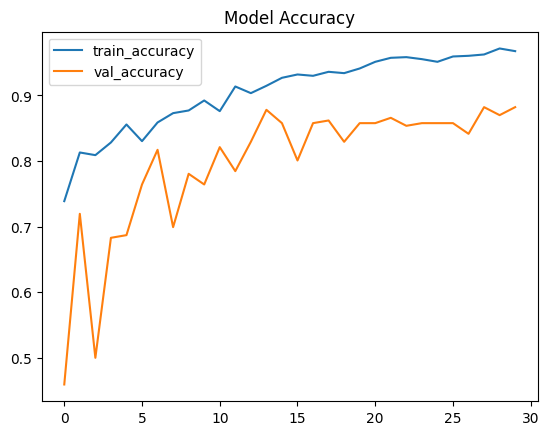

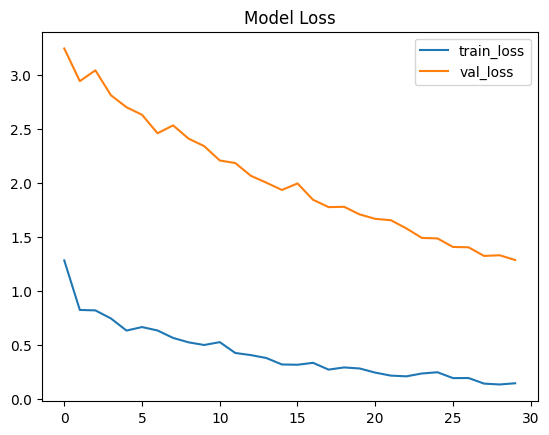

In [14]:
# Visualize training performance
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [15]:
model.save('CNN_model_files/cnn_model_4.h5')  # This will save the model in HDF5 format
print("Model saved to 'seismogram_cnn_model.h5'")

Model saved to 'seismogram_cnn_model.h5'


In [16]:
# # Example of evaluating on a test set (if you have a separate test set)
# # Assuming X_test_seismo and X_test_aux contain test data, and y_test contains test labels
# test_loss, test_accuracy = model.evaluate([X_test_seismo, X_test_aux], y_test)
# print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")